<a href="https://colab.research.google.com/github/King-of-Haskul/Machine-Learning-And-Data-Science/blob/main/Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reuters datasets is a set of short newswires and their topics, published by Reuters in 1986. The training set contains a list of integers i.e. word indices in the newswire. Lables are the 46 mutually exclusive different topics that the newswire was about.




In [3]:
import keras

In [1]:
import numpy as np

In [17]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [18]:
len(train_data)

8982

In [19]:
len(test_data)

2246

In [20]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### Decoding newswires back to text

In [21]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '') for i in train_data[10]])
print(decoded_newswire)

 period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


### Encoding the data



In [22]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Encoding the labels

In [23]:
#Manual Implementation of one-hot encoding:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i,label in enumerate(labels):
    results[i, label] = 1
  return results

#Using Keras built-in functions:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
one_hot_test_labels.shape

(2246, 46)

### Building the network and training it

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 15s 82ms/step - loss: 3.2000 - accuracy: 0.4020 - val_loss: 1.7916 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.5563 - accuracy: 0.6835 - val_loss: 1.3021 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0998 - accuracy: 0.7665 - val_loss: 1.1169 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8296 - accuracy: 0.8281 - val_loss: 1.0123 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6444 - accuracy: 0.8608 - val_loss: 0.9578 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5052 - accuracy: 0.8943 - val_loss: 0.9224 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4105 - accuracy: 0.9136 - val_loss: 0.8796 - val_accuracy: 0.8150
Epoch 8/20
1

### Plotting Training and Validation loss and accuracy

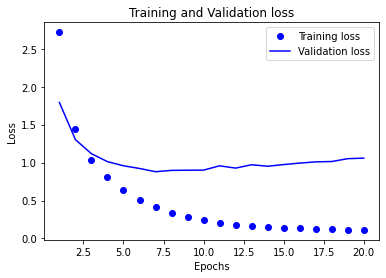

In [30]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

[]

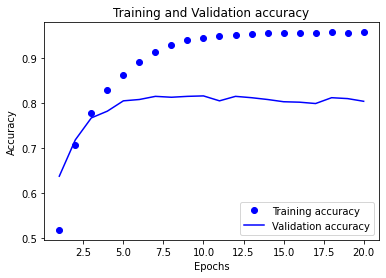

In [31]:
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.plot()

### Retraining 
with epochs=9

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print("Accuracy = ",results[1],"%")

Epoch 1/9
16/16 [==============================] - 2s 81ms/step - loss: 3.2531 - accuracy: 0.3822 - val_loss: 1.8733 - val_accuracy: 0.6350
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.6134 - accuracy: 0.6830 - val_loss: 1.3405 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.1220 - accuracy: 0.7640 - val_loss: 1.1483 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8671 - accuracy: 0.8158 - val_loss: 1.0574 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6789 - accuracy: 0.8587 - val_loss: 0.9936 - val_accuracy: 0.7890
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5485 - accuracy: 0.8856 - val_loss: 0.9335 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4131 - accuracy: 0.9189 - val_loss: 0.9202 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===